In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')

%matplotlib inline 

In [2]:
URL = pd.read_json('https://data.seattle.gov/resource/4xy5-26gy.json')

In [3]:
df = pd.DataFrame(URL)
df.set_index('date', inplace=True)
df.columns = ['North', 'South']
print(df.head())

                     North  South
date                             
2015-02-24 02:00:00      3      3
2017-01-09 06:00:00     55     28
2012-12-02 14:00:00     25     16
2016-02-15 00:00:00      3      3
2015-12-18 21:00:00      7     17


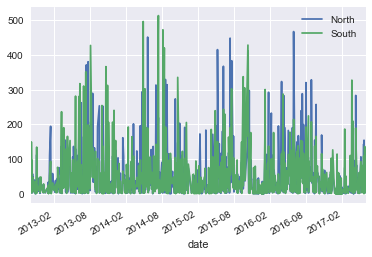

In [4]:
df.plot()
plt.show()

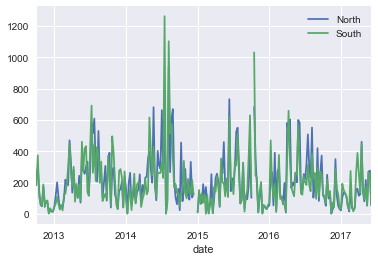

In [5]:
df.resample('W').sum().plot();

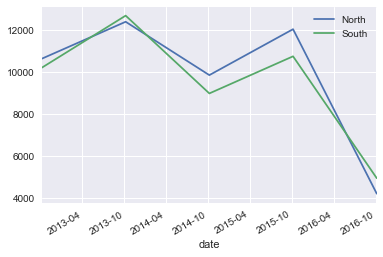

In [6]:
#df.resample('365D').sum().rolling('365D').sum().plot();
df.resample('365D').sum().plot()

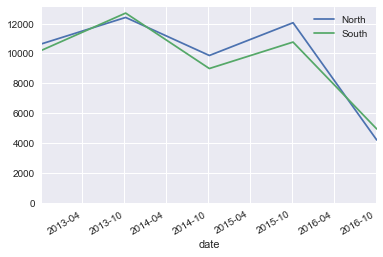

In [7]:
ax = df.resample('365D').sum().plot()
ax.set_ylim(0, None);


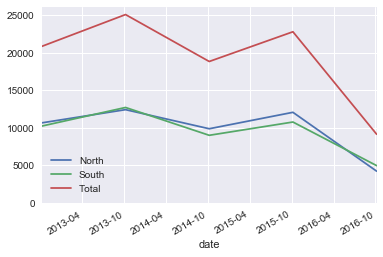

In [8]:
df['Total'] = df['North'] + df['South']
ax = df.resample('365D').sum().plot()
ax.set_ylim(0, None);

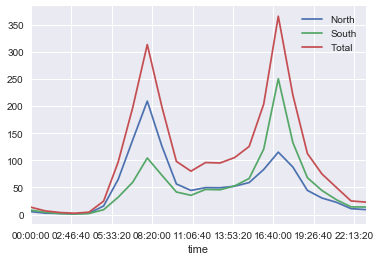

In [9]:
# group by time of day
df.groupby(df.index.time).mean().plot();

In [10]:
# to see the whole dataset
pivoted = df.pivot_table(['North', 'South','Total'], columns=df.index.date)
pivoted.iloc[:5, :5]
#df.fillna(df.mean())


,2012-10-06,2012-10-07,2012-10-08,2012-10-09,2012-10-12
North,15.0,113.0,41.5,46.666667,35.5
South,19.0,82.0,39.5,64.333333,49.5
Total,34.0,195.0,81.0,111.000000,85.0


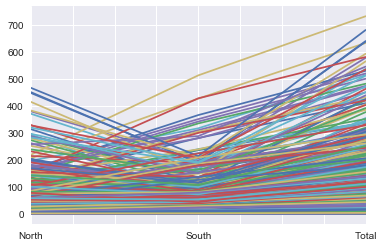

In [11]:
# lines for each day of the year
pivoted.plot(legend=False);

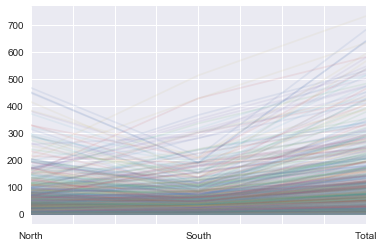

In [12]:
# transparancy 
pivoted.plot(legend=False, alpha=0.1);